In [22]:
import pandas as pd
import numpy as np

In [6]:
file_path = '../../data/raw_daily_data_15_20.csv'

In [28]:
data = pd.read_csv(file_path)

In [29]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,207.990005,208.190002,205.389999,205.539993,182.844467,130333800
1,2015-01-02,206.380005,206.880005,204.179993,205.429993,182.746567,121465900
2,2015-01-05,204.169998,204.369995,201.350006,201.720001,179.446259,169632600
3,2015-01-06,202.089996,202.720001,198.860001,199.820007,177.756073,209151400
4,2015-01-07,201.419998,202.720001,200.880005,202.309998,179.971115,125346700


Daily Returns: Day-To-Day Percentage Change

In [30]:
data['Day_Perc_Change'] = data['Adj Close'].pct_change()*100
data.dropna(axis=0, inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change
1,2015-01-02,206.380005,206.880005,204.179993,205.429993,182.746567,121465900,-0.053543
2,2015-01-05,204.169998,204.369995,201.350006,201.720001,179.446259,169632600,-1.805948
3,2015-01-06,202.089996,202.720001,198.860001,199.820007,177.756073,209151400,-0.941890
4,2015-01-07,201.419998,202.720001,200.880005,202.309998,179.971115,125346700,1.246113
5,2015-01-08,204.009995,206.160004,203.990005,205.899994,183.164703,147217800,1.774500


In [31]:
data = data.set_index('Date')

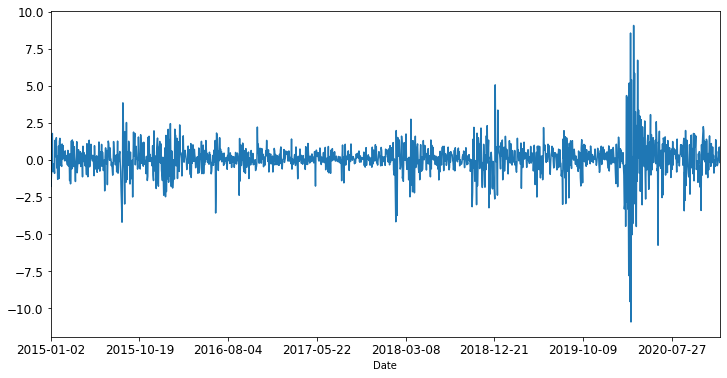

In [32]:
data['Day_Perc_Change'].plot(figsize = (12, 6), fontsize = 12)

Volitility Analysis

In [33]:
vol = data['Adj Close'].rolling(7).std()*np.sqrt(7)

In [35]:
vol

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
                ...   
2020-12-23    3.094805
2020-12-24    3.092428
2020-12-28    4.734476
2020-12-29    5.096327
2020-12-30    5.801942
Name: Adj Close, Length: 1510, dtype: float64

In [36]:
data = data.assign(Volatility=vol)

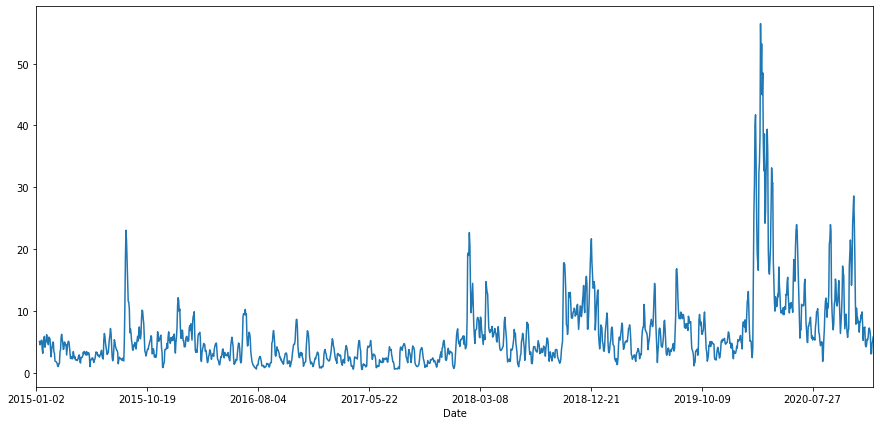

In [38]:
data.Volatility.plot(figsize=(15,7))

In [39]:
data.to_csv('data_vol.csv')